In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
from sklearn.ensemble import RandomForestRegressor

In [2]:
df = pd.read_csv('D:/amy/project/RFLFSODataFull.csv')

In [3]:
df

,FSO_Att,RFL_Att,AbsoluteHumidity,AbsoluteHumidityMax,AbsoluteHumidityMin,Distance,Frequency,Particulate,ParticulateMax,ParticulateMin,...,TemperatureMax,TemperatureMin,Time,Visibility,VisibilityMax,VisibilityMin,WindDirection,WindSpeed,WindSpeedMax,WindSpeedMin
0,7.913289,6.927868,17.595709,17.615907,17.340148,2115.338398,83500000000,0.000000,0.000000,0.000000,...,26.603030,24.680849,9,65884.518460,72336.362233,65617.543754,88.755450,3.057066,6.863808,3.007939
1,7.451176,4.412096,17.549693,17.572415,17.299439,2113.999257,73500000000,0.000000,0.000000,0.000000,...,26.377164,24.313108,9,64963.410920,68753.386153,60379.327485,99.790057,2.727910,6.468903,2.537393
2,7.072747,6.268740,17.290230,17.644014,16.037894,2118.689047,83500000000,0.000000,0.000000,0.000000,...,27.670822,23.150277,10,54794.281070,54821.773817,50850.155963,65.730085,1.674810,2.826916,1.640809
3,6.949288,4.317853,16.820880,17.066776,15.895622,2114.632339,73500000000,0.000000,0.000000,0.000000,...,26.522100,23.174815,10,50205.641590,52519.927530,45374.510898,88.127497,0.962068,2.780643,0.886951
4,7.361052,6.114514,16.813820,17.953974,15.227225,2116.786055,83500000000,0.000000,0.000000,0.000000,...,26.305736,24.864100,10,59038.325990,64418.329138,54461.246506,84.167414,1.881007,4.476298,1.874052
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91374,9.150012,11.968291,23.283256,24.142871,22.169805,3970.846129,83500000000,0.000000,0.000000,0.000000,...,27.257926,26.013205,4,13041.847800,13458.340663,12411.852994,91.391749,0.000000,0.027596,0.000000
91375,9.333777,11.538030,23.259618,25.104895,21.005496,3969.230652,73500000000,0.000000,0.000000,0.000000,...,28.101044,25.032282,4,15959.633590,16232.735439,15345.485232,47.997946,0.075640,0.349551,0.069834
91376,8.873168,11.491891,23.331697,23.996130,22.148649,3968.373512,83500000000,0.000000,0.000000,0.000000,...,28.249678,26.205773,4,13129.663750,13948.560177,11925.979953,103.963102,0.052282,0.178062,0.049824
91377,9.538886,11.526529,21.241027,21.624932,20.736391,3967.550165,73500000000,29.693160,30.761540,28.497137,...,26.880084,25.031934,5,15082.787860,15522.762221,14842.654291,82.090779,0.443520,1.838449,0.413146


In [4]:
len(df)

91379

In [5]:
df.head()

,FSO_Att,RFL_Att,AbsoluteHumidity,AbsoluteHumidityMax,AbsoluteHumidityMin,Distance,Frequency,Particulate,ParticulateMax,ParticulateMin,...,TemperatureMax,TemperatureMin,Time,Visibility,VisibilityMax,VisibilityMin,WindDirection,WindSpeed,WindSpeedMax,WindSpeedMin
0,7.913289,6.927868,17.595709,17.615907,17.340148,2115.338398,83500000000,0.0,0.0,0.0,...,26.603030,24.680849,9,65884.51846,72336.362233,65617.543754,88.755450,3.057066,6.863808,3.007939
1,7.451176,4.412096,17.549693,17.572415,17.299439,2113.999257,73500000000,0.0,0.0,0.0,...,26.377164,24.313108,9,64963.41092,68753.386153,60379.327485,99.790057,2.727910,6.468903,2.537393
2,7.072747,6.268740,17.290230,17.644014,16.037894,2118.689047,83500000000,0.0,0.0,0.0,...,27.670822,23.150277,10,54794.28107,54821.773817,50850.155963,65.730085,1.674810,2.826916,1.640809
3,6.949288,4.317853,16.820880,17.066776,15.895622,2114.632339,73500000000,0.0,0.0,0.0,...,26.522100,23.174815,10,50205.64159,52519.927530,45374.510898,88.127497,0.962068,2.780643,0.886951
4,7.361052,6.114514,16.813820,17.953974,15.227225,2116.786055,83500000000,0.0,0.0,0.0,...,26.305736,24.864100,10,59038.32599,64418.329138,54461.246506,84.167414,1.881007,4.476298,1.874052


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91379 entries, 0 to 91378
Data columns (total 27 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   FSO_Att                91379 non-null  float64
 1   RFL_Att                91379 non-null  float64
 2   AbsoluteHumidity       91379 non-null  float64
 3   AbsoluteHumidityMax    91379 non-null  float64
 4   AbsoluteHumidityMin    91379 non-null  float64
 5   Distance               91379 non-null  float64
 6   Frequency              91379 non-null  int64  
 7   Particulate            91379 non-null  float64
 8   ParticulateMax         91379 non-null  float64
 9   ParticulateMin         91379 non-null  float64
 10  RainIntensity          91379 non-null  float64
 11  RainIntensityMax       91379 non-null  float64
 12  RainIntensityMin       91379 non-null  float64
 13  RelativeHumidity       91379 non-null  float64
 14  SYNOPCode              91379 non-null  int64  
 15  Te

In [7]:
df.describe()

,FSO_Att,RFL_Att,AbsoluteHumidity,AbsoluteHumidityMax,AbsoluteHumidityMin,Distance,Frequency,Particulate,ParticulateMax,ParticulateMin,...,TemperatureMax,TemperatureMin,Time,Visibility,VisibilityMax,VisibilityMin,WindDirection,WindSpeed,WindSpeedMax,WindSpeedMin
count,91379.000000,91379.000000,91379.000000,91379.000000,91379.000000,91379.000000,9.137900e+04,91379.000000,91379.000000,91379.000000,...,91379.000000,91379.000000,91379.000000,91379.000000,91379.000000,91379.000000,91379.000000,91379.000000,91379.000000,91379.000000
mean,6.769458,11.619098,9.553919,10.032760,9.076251,3297.930328,7.850005e+10,27.065979,28.417120,25.717089,...,13.166020,11.904558,11.373193,32986.417484,34636.684647,31331.618978,89.043304,0.739065,1.851020,0.702242
std,3.903843,3.438873,5.858577,6.162798,5.575927,1224.305893,5.000027e+09,72.134023,75.761896,68.595239,...,9.589755,8.694028,6.942229,24713.874445,25978.845228,23497.873065,26.415610,0.871314,1.762698,0.828796
min,0.788363,0.027142,1.141556,1.238270,1.049744,2012.000148,7.350000e+10,0.000000,0.000000,0.000000,...,-6.693373,-7.270075,0.000000,10.151990,11.029667,9.484346,0.000000,0.000000,0.000000,0.000000
25%,3.473063,10.829331,4.958993,5.205861,4.709511,2019.431812,7.350000e+10,0.000000,0.000000,0.000000,...,4.905387,4.438425,5.000000,11158.598400,11721.447542,10588.793237,82.976727,0.076749,0.512667,0.072912
50%,6.336167,11.856560,6.870737,7.205499,6.524046,2959.863686,8.350000e+10,0.000000,0.000000,0.000000,...,10.803943,9.774467,11.000000,26378.636210,27686.214032,25047.188462,90.867362,0.437995,1.323101,0.416274
75%,8.664984,12.847944,14.049470,14.782679,13.379256,4820.890157,8.350000e+10,16.947618,17.775980,16.038090,...,22.470382,20.322434,17.000000,53493.821285,56092.212376,50797.690402,98.482652,1.088621,2.681788,1.036574
max,32.455222,46.893150,24.790883,26.407305,24.268431,4827.999971,8.350000e+10,1621.001906,1753.747866,1500.666382,...,40.771383,36.724191,23.000000,75004.999150,82503.130084,74999.343414,360.000000,7.799086,16.421115,7.252319


In [8]:
df.isnull().sum()

FSO_Att                  0
RFL_Att                  0
AbsoluteHumidity         0
AbsoluteHumidityMax      0
AbsoluteHumidityMin      0
Distance                 0
Frequency                0
Particulate              0
ParticulateMax           0
ParticulateMin           0
RainIntensity            0
RainIntensityMax         0
RainIntensityMin         0
RelativeHumidity         0
SYNOPCode                0
Temperature              0
TemperatureDifference    0
TemperatureMax           0
TemperatureMin           0
Time                     0
Visibility               0
VisibilityMax            0
VisibilityMin            0
WindDirection            0
WindSpeed                0
WindSpeedMax             0
WindSpeedMin             0
dtype: int64

In [9]:
df['SYNOPCode'].unique()

array([0, 6, 8, 5, 3, 4, 7], dtype=int64)

# Visualization

**Heat map**

In [10]:
# Calculate the correlation matrix
correlation_matrix = df.corr()

# Extract correlations with FSO_Att and RFL_Att
correlation_with_fso_rfl = correlation_matrix[['FSO_Att', 'RFL_Att']]

# Sort by the absolute values of the correlations
top_fso_correlations = correlation_with_fso_rfl.reindex(correlation_with_fso_rfl['FSO_Att'].abs().sort_values(ascending=False).index).head(6)
top_rfl_correlations = correlation_with_fso_rfl.reindex(correlation_with_fso_rfl['RFL_Att'].abs().sort_values(ascending=False).index).head(6)

# Display the top 5 correlations for each target variable
top_fso_correlations, top_rfl_correlations


(                   FSO_Att   RFL_Att
 FSO_Att           1.000000  0.089866
 ParticulateMin    0.394339  0.525213
 Particulate       0.394289  0.525601
 ParticulateMax    0.394061  0.525877
 RelativeHumidity  0.383411  0.213509
 Visibility       -0.367476 -0.319330,
                    FSO_Att   RFL_Att
 RFL_Att           0.089866  1.000000
 ParticulateMax    0.394061  0.525877
 Particulate       0.394289  0.525601
 ParticulateMin    0.394339  0.525213
 RainIntensityMin  0.225420  0.424917
 RainIntensityMax  0.225584  0.424733)

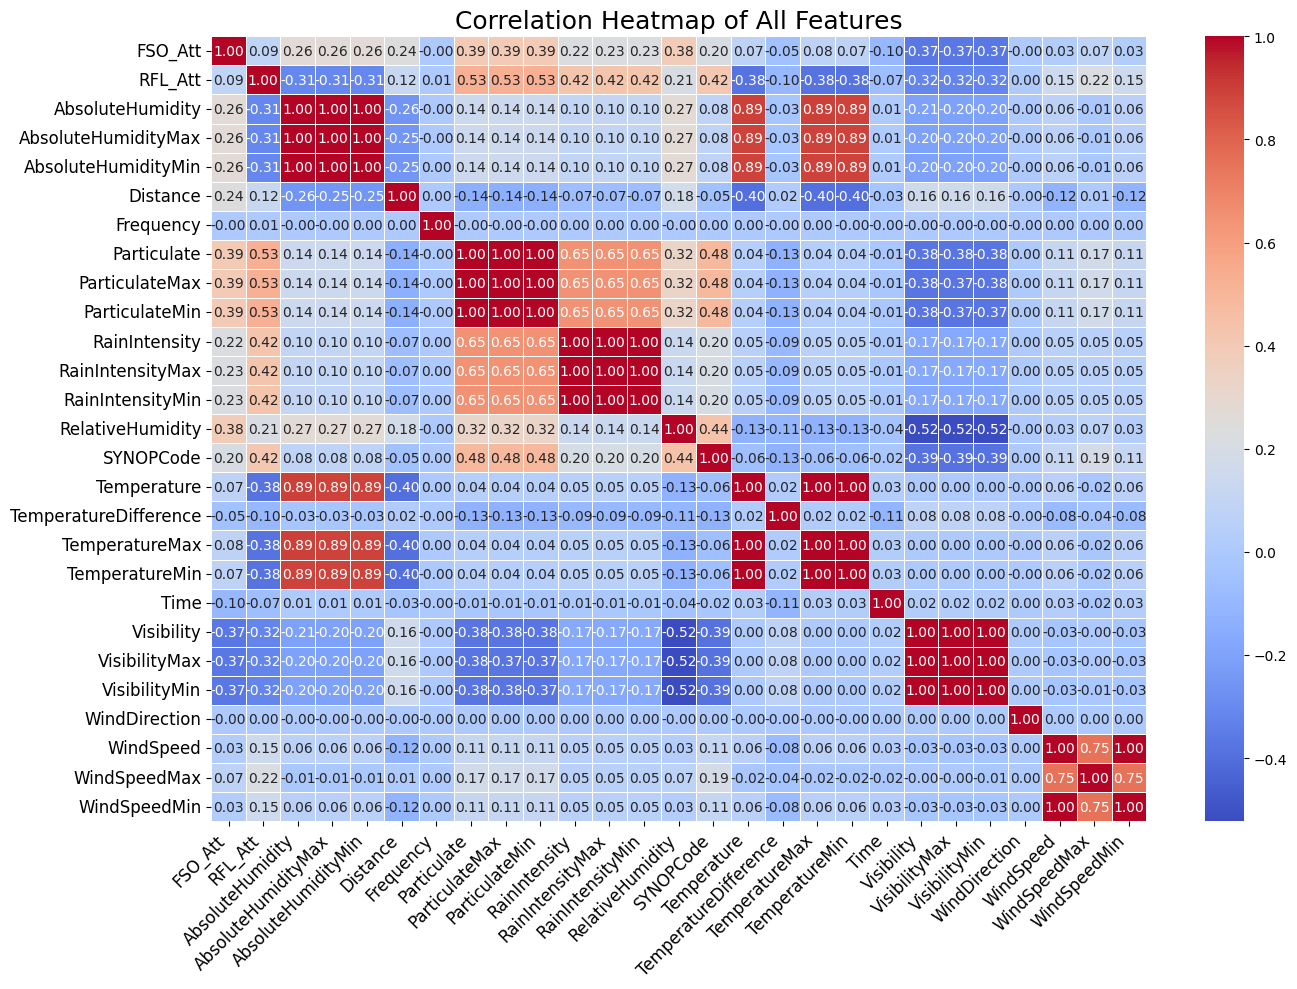

In [11]:
#draw the heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True, linewidths=0.5, linecolor='white')
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(rotation=0, fontsize=12)
plt.title("Correlation Heatmap of All Features", fontsize=18)
plt.tight_layout()
plt.show()

In [12]:
# Scatter plot function for bivariate relationships
def plot_scatter(data, x_col, y_col, title):
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=data[x_col], y=data[y_col])
    plt.title(title, fontsize=14)
    plt.xlabel(x_col)
    plt.ylabel(y_col)
    plt.grid(True)
    plt.show()

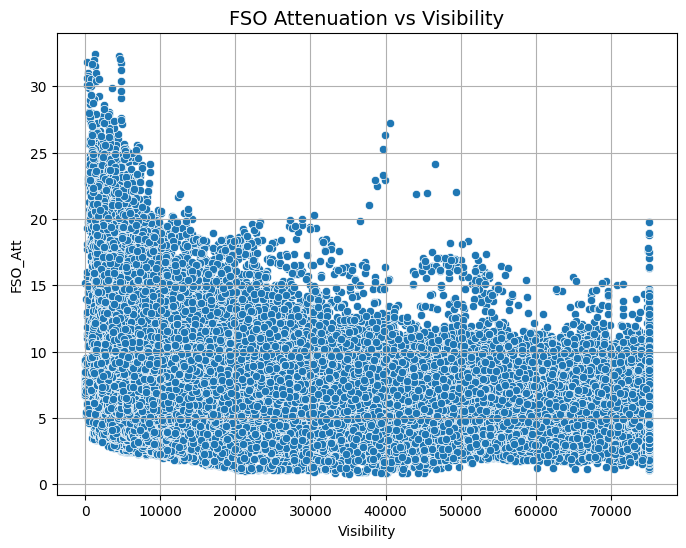

In [13]:
plot_scatter(df, 'Visibility', 'FSO_Att', 'FSO Attenuation vs Visibility')

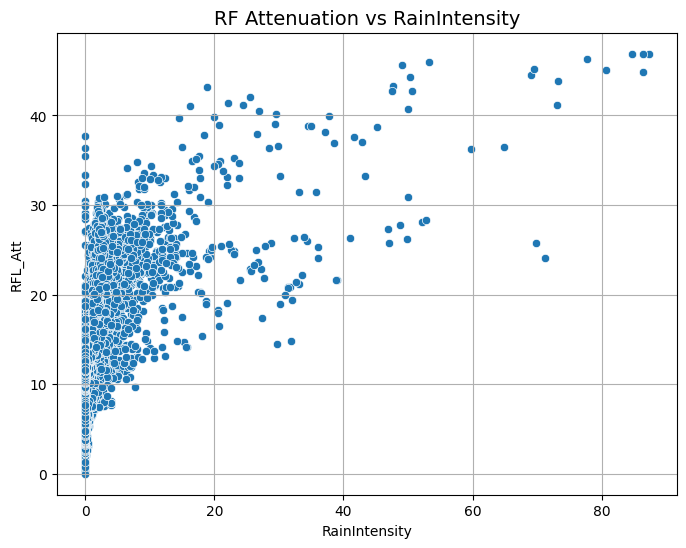

In [14]:
plot_scatter(df, 'RainIntensity', 'RFL_Att', 'RF Attenuation vs RainIntensity')

# TRAIN ON THE WHOLE DATASET

In [15]:
X = df.drop(['FSO_Att', 'RFL_Att'], axis=1)
y1 = df['FSO_Att']  # For FSO_Att
y2 = df['RFL_Att']  # For RFL_Att
X_train, X_test, y_train_fso, y_test_fso = train_test_split(X, y1, test_size=0.2, random_state=42)
X_train, X_test, y_train_rfl, y_test_rfl = train_test_split(X, y2, test_size=0.2, random_state=42)

**Model 1 for FSO_Att**

In [16]:
model1_1 = RandomForestRegressor(n_estimators=100, random_state=42)               
model1_1.fit(X_train, y_train_fso)

y_pred_1 = model1_1.predict(X_test)
rmse_generic = np.sqrt(mean_squared_error(y_test_fso, y_pred_1))
r2_generic = r2_score(y_test_fso, y_pred_1)
print(f"Model of FSO_Att: RMSE={rmse_generic}, R2={r2_generic}")

Model of FSO_Att: RMSE=0.7844528013662615, R2=0.958985616838711


**Model 2 for RFL_Att**

In [17]:
model1_2 = RandomForestRegressor(n_estimators=100, random_state=42)
model1_2.fit(X_train, y_train_rfl)

y_pred_2 = model1_2.predict(X_test)
rmse_2 = np.sqrt(mean_squared_error(y_test_rfl, y_pred_2))
r2_2 = r2_score(y_test_rfl, y_pred_2)
print(f"Model of RFL_Att: RMSE={rmse_2}, R2={r2_2}")

Model of RFL_Att: RMSE=0.4900912459622789, R2=0.9797240208538209


# SPILIT AND TRAIN MODEL WITH DIFFERENT SYNOP code

In [22]:
df['SYNOPCode'].unique()

array([0, 6, 8, 5, 3, 4, 7], dtype=int64)

In [23]:
#SYNOPCode == 0, mean clear weather
df0 = df[df['SYNOPCode'] == 0]
df0

,FSO_Att,RFL_Att,AbsoluteHumidity,AbsoluteHumidityMax,AbsoluteHumidityMin,Distance,Frequency,Particulate,ParticulateMax,ParticulateMin,...,TemperatureMax,TemperatureMin,Time,Visibility,VisibilityMax,VisibilityMin,WindDirection,WindSpeed,WindSpeedMax,WindSpeedMin
0,7.913289,6.927868,17.595709,17.615907,17.340148,2115.338398,83500000000,0.000000,0.000000,0.000000,...,26.603030,24.680849,9,65884.518460,72336.362233,65617.543754,88.755450,3.057066,6.863808,3.007939
1,7.451176,4.412096,17.549693,17.572415,17.299439,2113.999257,73500000000,0.000000,0.000000,0.000000,...,26.377164,24.313108,9,64963.410920,68753.386153,60379.327485,99.790057,2.727910,6.468903,2.537393
2,7.072747,6.268740,17.290230,17.644014,16.037894,2118.689047,83500000000,0.000000,0.000000,0.000000,...,27.670822,23.150277,10,54794.281070,54821.773817,50850.155963,65.730085,1.674810,2.826916,1.640809
3,6.949288,4.317853,16.820880,17.066776,15.895622,2114.632339,73500000000,0.000000,0.000000,0.000000,...,26.522100,23.174815,10,50205.641590,52519.927530,45374.510898,88.127497,0.962068,2.780643,0.886951
4,7.361052,6.114514,16.813820,17.953974,15.227225,2116.786055,83500000000,0.000000,0.000000,0.000000,...,26.305736,24.864100,10,59038.325990,64418.329138,54461.246506,84.167414,1.881007,4.476298,1.874052
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91374,9.150012,11.968291,23.283256,24.142871,22.169805,3970.846129,83500000000,0.000000,0.000000,0.000000,...,27.257926,26.013205,4,13041.847800,13458.340663,12411.852994,91.391749,0.000000,0.027596,0.000000
91375,9.333777,11.538030,23.259618,25.104895,21.005496,3969.230652,73500000000,0.000000,0.000000,0.000000,...,28.101044,25.032282,4,15959.633590,16232.735439,15345.485232,47.997946,0.075640,0.349551,0.069834
91376,8.873168,11.491891,23.331697,23.996130,22.148649,3968.373512,83500000000,0.000000,0.000000,0.000000,...,28.249678,26.205773,4,13129.663750,13948.560177,11925.979953,103.963102,0.052282,0.178062,0.049824
91377,9.538886,11.526529,21.241027,21.624932,20.736391,3967.550165,73500000000,29.693160,30.761540,28.497137,...,26.880084,25.031934,5,15082.787860,15522.762221,14842.654291,82.090779,0.443520,1.838449,0.413146


In [24]:
#SYNOPCode == 3, mean dust,storm weather
df3= df[df['SYNOPCode'] == 3]
df3

,FSO_Att,RFL_Att,AbsoluteHumidity,AbsoluteHumidityMax,AbsoluteHumidityMin,Distance,Frequency,Particulate,ParticulateMax,ParticulateMin,...,TemperatureMax,TemperatureMin,Time,Visibility,VisibilityMax,VisibilityMin,WindDirection,WindSpeed,WindSpeedMax,WindSpeedMin
1116,13.997498,9.043323,20.244567,20.819340,18.475689,2115.667536,83500000000,0.0,0.0,0.0,...,25.021254,21.063413,17,141.152237,154.806868,129.044488,89.986054,0.076957,0.684638,0.072223
3745,10.946154,6.088839,20.164626,20.833908,19.261558,2119.138170,73500000000,0.0,0.0,0.0,...,25.182210,20.854708,17,2936.215800,2985.174438,2898.281083,103.503641,0.274992,0.753250,0.254561
5409,7.419227,8.094719,17.515085,18.017632,16.110214,2962.180194,73500000000,0.0,0.0,0.0,...,24.086457,22.270371,14,26762.246420,27056.350834,24252.617383,99.446719,0.476145,0.943513,0.474088
5414,7.473629,8.001488,17.796149,18.858701,17.232316,2964.409031,83500000000,0.0,0.0,0.0,...,24.634976,23.073526,14,9383.749728,9504.425544,8736.247346,50.994814,0.172512,0.584785,0.161008
5418,7.892708,8.062292,17.943657,17.995399,16.521335,2963.216445,83500000000,0.0,0.0,0.0,...,23.263533,22.161422,15,578.014621,598.699391,577.802421,104.418343,0.000000,0.091539,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78379,10.298313,12.711575,4.636653,4.700021,4.519128,4825.164075,73500000000,0.0,0.0,0.0,...,-0.363108,-0.398648,4,1848.262236,1869.723604,1697.162316,85.261099,0.015896,0.025341,0.014470
78380,10.361821,12.316199,4.588537,4.625096,4.318343,4827.289403,83500000000,0.0,0.0,0.0,...,-0.269643,-0.301455,4,1648.870241,1812.208227,1552.672739,99.470423,0.132506,0.266973,0.128366
78381,9.741072,13.253359,4.727778,4.940151,4.540771,4818.044163,73500000000,0.0,0.0,0.0,...,-0.361714,-0.399792,4,2592.916108,2826.084363,2496.994303,81.380582,0.146400,0.290531,0.139779
78382,9.439828,12.313026,4.697691,4.956181,4.630608,4823.899772,83500000000,0.0,0.0,0.0,...,-0.219922,-0.248999,4,2718.073152,2943.844915,2491.009485,65.295172,0.077787,0.191556,0.070718


In [25]:
#SYNOPCode == 4, mean fog weather
df4 = df[df['SYNOPCode'] == 4]
df4

,FSO_Att,RFL_Att,AbsoluteHumidity,AbsoluteHumidityMax,AbsoluteHumidityMin,Distance,Frequency,Particulate,ParticulateMax,ParticulateMin,...,TemperatureMax,TemperatureMin,Time,Visibility,VisibilityMax,VisibilityMin,WindDirection,WindSpeed,WindSpeedMax,WindSpeedMin
5302,7.516704,10.205776,17.686925,18.801950,17.127009,2964.675409,83500000000,15.179702,15.755447,13.742694,...,25.841196,24.106189,11,9446.603833,9480.921743,8559.072445,88.873997,0.000000,1.024578,0.000000
5316,7.274076,9.176182,17.673658,19.108834,16.738390,2960.742928,83500000000,13.900703,15.049485,13.230616,...,24.619464,23.525396,11,257.811683,262.021047,251.982970,91.606445,0.345162,1.238707,0.338332
5322,6.982446,10.233360,17.703341,18.502817,16.730091,2955.687061,83500000000,30.443877,31.541453,28.798566,...,26.063762,22.581363,12,34.834294,36.078705,34.615641,107.702237,0.083843,1.432264,0.079327
5328,6.988898,7.814947,17.581570,19.158579,16.269258,2957.927370,83500000000,0.000000,0.000000,0.000000,...,25.915664,23.502471,12,29.923493,29.961843,29.529582,70.568955,0.785137,2.112298,0.781756
5375,7.345591,9.807727,17.099042,17.730567,15.820980,2959.455092,73500000000,10.021564,10.500068,9.178899,...,24.810671,21.671987,13,3854.820667,4019.194085,3795.403278,54.000214,0.000000,0.221063,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82673,11.425858,13.919395,4.745776,4.856423,4.443515,4825.634696,73500000000,7.855904,8.221264,7.675225,...,0.711927,0.599517,23,39123.247140,40288.443589,38089.521308,94.485489,0.392430,2.719377,0.378687
82674,11.404671,13.287766,4.654969,4.745123,4.204716,4823.781642,83500000000,7.924229,8.207374,7.342110,...,0.778248,0.721995,23,41297.470520,42980.555520,40876.418369,121.240888,1.163113,4.060007,1.120483
82742,9.504109,12.415965,4.759933,4.796343,4.430455,4824.610165,83500000000,0.000000,0.000000,0.000000,...,0.619287,0.580434,1,22713.239520,23868.695304,20656.837849,91.478465,0.993168,5.749203,0.982830
82946,9.466038,11.152394,3.682117,3.843633,3.603199,4822.483619,83500000000,12.199592,13.374298,11.323808,...,1.322504,1.234432,2,53711.385510,58238.666302,52655.172285,97.813379,1.298064,3.642118,1.258924


In [26]:
#SYNOPCode == 5, mean drizzle weather
df5 = df[df['SYNOPCode'] == 5]
df5

,FSO_Att,RFL_Att,AbsoluteHumidity,AbsoluteHumidityMax,AbsoluteHumidityMin,Distance,Frequency,Particulate,ParticulateMax,ParticulateMin,...,TemperatureMax,TemperatureMin,Time,Visibility,VisibilityMax,VisibilityMin,WindDirection,WindSpeed,WindSpeedMax,WindSpeedMin
15,9.300406,5.244079,17.185505,18.653305,16.207035,2121.244675,73500000000,10.808326,11.175887,9.834743,...,27.448687,23.839945,12,28722.336700,29397.995549,25860.792171,88.351940,1.722910,3.031238,1.718081
16,8.871024,7.291416,17.229357,18.677536,16.612769,2118.661428,83500000000,11.054484,11.774542,11.006569,...,26.503255,22.942969,12,34496.427220,36312.940569,32457.442933,49.231282,1.535558,2.443233,1.523731
18,8.069683,7.455618,17.250586,17.783436,15.814667,2115.856825,83500000000,17.766362,17.768354,16.415408,...,26.080919,24.722163,12,35093.541480,37001.968256,34200.532025,88.523877,0.584222,1.319418,0.583062
19,8.162879,5.508202,17.340500,18.893058,16.326125,2114.046745,73500000000,17.861359,18.846504,16.319471,...,26.068064,22.705546,12,31631.188820,34775.885722,31235.733568,89.832847,0.765632,2.518114,0.748049
51,9.808266,6.543880,17.198373,17.348683,15.739655,2115.111762,73500000000,94.388573,98.523937,92.358241,...,24.647955,23.917554,20,11324.489060,11976.843521,10553.346314,118.173932,0.704093,1.946388,0.652809
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82975,19.183693,12.115341,4.625150,4.681871,4.580284,4819.920433,73500000000,41.466489,42.211939,37.759875,...,0.105342,0.091717,5,13946.422740,14415.654441,13878.797560,88.070956,0.000000,3.110273,0.000000
82976,19.732313,11.936948,4.570721,4.937725,4.306865,4824.950840,83500000000,49.566655,52.571287,45.846270,...,0.036782,0.035413,5,12213.811180,12940.153828,11242.361964,83.989621,0.000000,2.685586,0.000000
82977,20.658081,12.196225,4.617010,4.890746,4.229281,4826.736964,73500000000,61.084488,61.575022,59.254588,...,0.179898,0.163476,5,9745.869282,9792.910665,9744.534980,82.889269,0.000000,1.401336,0.000000
82978,20.581515,11.982378,4.523463,4.656520,4.361216,4818.382066,83500000000,62.076146,65.953108,60.721674,...,0.053340,0.046824,5,10113.178540,10775.906192,9656.456375,61.367345,0.000000,1.639619,0.000000


In [27]:
#SYNOPCode == 6, mean rain weather
df6 = df[df['SYNOPCode'] == 6]
df6

,FSO_Att,RFL_Att,AbsoluteHumidity,AbsoluteHumidityMax,AbsoluteHumidityMin,Distance,Frequency,Particulate,ParticulateMax,ParticulateMin,...,TemperatureMax,TemperatureMin,Time,Visibility,VisibilityMax,VisibilityMin,WindDirection,WindSpeed,WindSpeedMax,WindSpeedMin
11,9.454984,6.192648,17.110882,18.253512,16.136476,2121.742706,73500000000,31.166958,32.256659,28.610426,...,27.199649,24.019869,12,22307.090730,24148.041177,20911.945622,85.849354,1.130489,2.281437,1.073491
12,10.225244,8.419039,17.094251,18.265652,15.789381,2113.301859,83500000000,38.636019,40.251065,36.001099,...,25.992804,23.936297,12,16474.118480,16954.163370,15683.965312,47.570930,1.442658,2.391959,1.347874
13,10.464235,6.846505,17.177814,17.774541,16.768849,2119.552177,73500000000,38.348434,40.345707,36.866758,...,25.827127,22.641892,12,17190.523660,17219.832084,16952.179620,88.563250,1.376956,2.283721,1.250756
49,9.688760,8.868540,17.353415,18.461959,15.814342,2114.326609,73500000000,190.577149,193.722437,173.950657,...,24.451862,22.980583,20,7917.023277,8474.387974,7204.754668,89.522022,1.204814,3.846755,1.161786
50,9.860963,9.403091,17.242779,17.822939,16.460828,2113.137305,83500000000,196.020128,204.063509,196.002472,...,25.482475,22.580847,20,7801.012785,8345.523848,7352.656897,84.904703,0.688722,2.028351,0.676013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82966,9.388685,12.361672,4.453328,4.490946,4.315968,4819.467079,83500000000,7.072978,7.184239,6.769559,...,0.068011,0.062961,5,32693.675790,33675.329175,31475.465928,26.968102,0.000000,2.283157,0.000000
82967,10.592875,12.596448,4.494811,4.816636,4.147151,4824.776440,73500000000,14.023997,14.476732,13.299350,...,-0.061637,-0.070248,5,28576.467700,29251.544490,26632.209114,125.432873,0.000000,0.780760,0.000000
82980,20.593353,12.003689,4.562548,4.840463,4.464255,4827.793957,83500000000,129.129206,132.306381,120.262614,...,0.178013,0.165917,5,5897.208961,6288.001741,5618.975859,83.253349,0.000000,1.091074,0.000000
82981,21.019652,14.149046,4.444572,4.735181,4.118985,4822.518200,73500000000,269.725512,276.902106,259.845617,...,0.178231,0.155395,5,3643.884024,3809.397962,3643.467700,85.765391,0.000000,1.201067,0.000000


In [28]:
#SYNOPCode == 7, mean snow weather
df7 = df[df['SYNOPCode'] == 7]
df7

,FSO_Att,RFL_Att,AbsoluteHumidity,AbsoluteHumidityMax,AbsoluteHumidityMin,Distance,Frequency,Particulate,ParticulateMax,ParticulateMin,...,TemperatureMax,TemperatureMin,Time,Visibility,VisibilityMax,VisibilityMin,WindDirection,WindSpeed,WindSpeedMax,WindSpeedMin
26376,11.842709,11.753958,4.823682,5.008315,4.535829,2016.201547,83500000000,8.946947,9.341061,8.755777,...,0.248796,0.221439,4,261.763900,270.742321,260.772597,107.936320,1.317832,2.393007,1.187603
26377,12.929019,11.462908,4.858163,5.220056,4.710651,2019.142871,73500000000,4.929538,5.002985,4.677153,...,0.444140,0.411138,4,698.137375,708.124616,660.255240,81.388080,0.916526,2.180236,0.832091
26378,12.824454,11.968017,4.856207,4.970426,4.471158,2018.983152,83500000000,4.930127,5.059871,4.813636,...,0.508478,0.458609,4,298.479758,316.669401,281.499732,77.126993,1.298236,1.810337,1.170564
26387,7.037328,12.145403,5.369520,5.854357,5.008599,2017.449639,73500000000,9.057393,9.557519,8.477054,...,1.779828,1.555566,6,819.925058,897.353892,795.091007,82.667069,0.404064,0.632523,0.394734
26388,7.204018,12.093161,5.295899,5.821342,5.131989,2021.558937,83500000000,0.000000,0.000000,0.000000,...,1.857622,1.594579,6,1533.128822,1625.542602,1436.800298,105.681073,0.366662,0.705202,0.338302
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82715,15.247160,14.755360,4.789096,5.003914,4.522221,4827.729740,73500000000,86.433649,92.252936,83.274578,...,0.277585,0.244202,0,8475.221404,8757.158032,8140.051825,114.082189,1.954355,5.458253,1.828062
82722,14.437509,13.907598,4.680198,4.951615,4.221572,4818.330707,83500000000,41.111193,43.887759,37.843327,...,0.363593,0.343840,0,9206.850133,9778.677598,8534.898416,91.399765,1.985421,4.769706,1.979718
82723,14.625421,13.834315,4.647546,4.670323,4.232081,4818.257415,73500000000,41.139111,42.879469,39.453649,...,0.359475,0.322103,0,10989.330680,11035.992517,9917.804884,85.488237,0.862790,5.837625,0.802416
82828,10.752150,12.849190,4.853483,5.156220,4.398391,4818.620211,83500000000,7.944964,8.248615,7.566119,...,0.792561,0.687925,5,29930.119490,32257.807803,27442.297148,110.109979,1.797913,3.562836,1.659548


In [29]:
#SYNOPCode == 8, mean showers weather
df8 = df[df['SYNOPCode'] == 8]
df8

,FSO_Att,RFL_Att,AbsoluteHumidity,AbsoluteHumidityMax,AbsoluteHumidityMin,Distance,Frequency,Particulate,ParticulateMax,ParticulateMin,...,TemperatureMax,TemperatureMin,Time,Visibility,VisibilityMax,VisibilityMin,WindDirection,WindSpeed,WindSpeedMax,WindSpeedMin
14,9.649171,7.171949,17.262824,17.650673,15.885822,2121.130895,83500000000,32.370061,34.663677,30.308719,...,26.860662,23.709790,12,26968.35883,27957.497475,25616.013501,62.960858,1.588138,2.496841,1.536522
20,8.171941,7.181019,17.583486,19.298023,16.822755,2113.551707,83500000000,0.000000,0.000000,0.000000,...,25.042082,24.193799,12,39597.93354,40566.225157,38465.319003,99.264971,0.874096,1.614558,0.860217
87,7.535523,5.136881,17.921942,19.598982,16.462489,2118.859344,73500000000,0.000000,0.000000,0.000000,...,22.726741,22.098783,0,37085.29954,37256.455073,34348.245927,89.123599,0.154461,0.184112,0.145983
180,7.707559,7.245108,17.030897,17.421117,15.850073,2115.888623,83500000000,0.000000,0.000000,0.000000,...,26.495755,23.770404,18,36598.46480,36671.764605,34678.512513,103.263943,1.261188,1.623821,1.150654
181,8.356710,4.743570,17.269364,17.970022,17.031733,2117.504373,73500000000,13.912339,14.426880,13.417510,...,24.532186,23.614042,18,25940.86379,28452.583547,24055.994734,100.478040,1.341056,1.797792,1.274658
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82532,7.754264,12.366070,4.457111,4.845222,4.293367,4822.933611,83500000000,7.133573,7.398327,6.997204,...,1.697396,1.531851,1,52520.24563,54258.242593,50738.624029,59.911834,1.667727,2.472327,1.649817
82533,7.873959,12.292626,4.496445,4.559748,4.074900,4822.217167,73500000000,0.000000,0.000000,0.000000,...,1.687709,1.461395,1,46382.33318,49745.513223,45330.572511,86.947371,0.883154,2.415317,0.799437
82534,7.809871,12.848060,4.496179,4.871242,4.385426,4824.070455,83500000000,7.931666,8.203054,7.857899,...,1.546206,1.458222,1,53280.21500,56264.323810,49759.611359,105.229774,1.209350,2.920373,1.187349
82535,7.864476,12.714629,4.572546,4.926224,4.242475,4820.074906,73500000000,8.071216,8.423944,7.835229,...,1.600808,1.482892,1,60026.79759,60284.717145,57999.730542,54.783968,1.514047,2.564783,1.390613


In [30]:
#check the length of all 
print(len(df0) + len(df3) + len(df4) + len(df5) + len(df6) + len(df7) + len(df8))

91379


In [31]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import numpy as np

**Method 1: specific random forest**

In [32]:
y = df0['RFL_Att']
X = df0.drop(['RFL_Att'], axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_0 = RandomForestRegressor(n_estimators=100, random_state=42)
rf_0.fit(X_train, y_train)

# Make predictions on the test data
y_pred = rf_0.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("Model Evaluation Metrics:")
print(f"Mean Squared Error (MSE): {rmse:.4f}")
print(f"R-squared (R2): {r2:.4f}")

feature_importances = pd.DataFrame({'Feature': X.columns,'Importance': rf_0.feature_importances_})
top_features = feature_importances.sort_values(by='Importance', ascending=False).head(5)

# Display the top 5 features
print("\nTop 5 Features by Importance:")
for i, row in top_features.iterrows():
    print(f"{row['Feature']}: {row['Importance']:.4f}")

Model Evaluation Metrics:
Mean Squared Error (MSE): 0.3856
R-squared (R2): 0.9774

Top 5 Features by Importance:
Distance: 0.4549
AbsoluteHumidity: 0.2205
AbsoluteHumidityMax: 0.1039
FSO_Att: 0.0584
Temperature: 0.0500


In [33]:
y = df3['RFL_Att']
X = df3.drop(['RFL_Att'], axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_3 = RandomForestRegressor(n_estimators=100, random_state=42)
rf_3.fit(X_train, y_train)

# Make predictions on the test data
y_pred = rf_3.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("Model Evaluation Metrics:")
print(f"Mean Squared Error (MSE): {rmse:.4f}")
print(f"R-squared (R2): {r2:.4f}")

feature_importances = pd.DataFrame({'Feature': X.columns,'Importance': rf_3.feature_importances_})
top_features = feature_importances.sort_values(by='Importance', ascending=False).head(5)

# Display the top 5 features
print("\nTop 5 Features by Importance:")
for i, row in top_features.iterrows():
    print(f"{row['Feature']}: {row['Importance']:.4f}")

Model Evaluation Metrics:
Mean Squared Error (MSE): 0.4210
R-squared (R2): 0.9836

Top 5 Features by Importance:
Time: 0.2146
Temperature: 0.1814
AbsoluteHumidity: 0.1621
AbsoluteHumidityMax: 0.1386
AbsoluteHumidityMin: 0.1005


In [34]:
y = df4['RFL_Att']
X = df4.drop(['RFL_Att'], axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_4 = RandomForestRegressor(n_estimators=100, random_state=42)
rf_4.fit(X_train, y_train)

# Make predictions on the test data
y_pred = rf_4.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("Model Evaluation Metrics:")
print(f"Mean Squared Error (MSE): {rmse:.4f}")
print(f"R-squared (R2): {r2:.4f}")

feature_importances = pd.DataFrame({'Feature': X.columns,'Importance': rf_4.feature_importances_})
top_features = feature_importances.sort_values(by='Importance', ascending=False).head(5)

# Display the top 5 features
print("\nTop 5 Features by Importance:")
for i, row in top_features.iterrows():
    print(f"{row['Feature']}: {row['Importance']:.4f}")

Model Evaluation Metrics:
Mean Squared Error (MSE): 0.4970
R-squared (R2): 0.9132

Top 5 Features by Importance:
RelativeHumidity: 0.4449
AbsoluteHumidityMin: 0.1227
RainIntensity: 0.0979
RainIntensityMin: 0.0775
RainIntensityMax: 0.0573


In [35]:
y = df5['RFL_Att']
X = df5.drop(['RFL_Att'], axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_5 = RandomForestRegressor(n_estimators=100, random_state=42)
rf_5.fit(X_train, y_train)

# Make predictions on the test data
y_pred = rf_5.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("Model Evaluation Metrics:")
print(f"Mean Squared Error (MSE): {rmse:.4f}")
print(f"R-squared (R2): {r2:.4f}")

feature_importances = pd.DataFrame({'Feature': X.columns,'Importance': rf_5.feature_importances_})
top_features = feature_importances.sort_values(by='Importance', ascending=False).head(5)

# Display the top 5 features
print("\nTop 5 Features by Importance:")
for i, row in top_features.iterrows():
    print(f"{row['Feature']}: {row['Importance']:.4f}")

Model Evaluation Metrics:
Mean Squared Error (MSE): 0.5969
R-squared (R2): 0.9586

Top 5 Features by Importance:
AbsoluteHumidity: 0.4035
AbsoluteHumidityMin: 0.1848
AbsoluteHumidityMax: 0.1678
RainIntensityMax: 0.0550
RainIntensity: 0.0285


In [36]:
y = df6['RFL_Att']
X = df6.drop(['RFL_Att'], axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_6 = RandomForestRegressor(n_estimators=100, random_state=42)
rf_6.fit(X_train, y_train)

# Make predictions on the test data
y_pred = rf_6.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("Model Evaluation Metrics:")
print(f"Mean Squared Error (MSE): {rmse:.4f}")
print(f"R-squared (R2): {r2:.4f}")

feature_importances = pd.DataFrame({'Feature': X.columns,'Importance': rf_6.feature_importances_})
top_features = feature_importances.sort_values(by='Importance', ascending=False).head(5)

# Display the top 5 features
print("\nTop 5 Features by Importance:")
for i, row in top_features.iterrows():
    print(f"{row['Feature']}: {row['Importance']:.4f}")

Model Evaluation Metrics:
Mean Squared Error (MSE): 0.6805
R-squared (R2): 0.9707

Top 5 Features by Importance:
RainIntensity: 0.2116
AbsoluteHumidity: 0.1773
RainIntensityMax: 0.1703
RainIntensityMin: 0.1238
Temperature: 0.0945


In [ ]:
y = df7['RFL_Att']
X = df7.drop(['RFL_Att'], axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_7 = RandomForestRegressor(n_estimators=100, random_state=42)
rf_7.fit(X_train, y_train)

# Make predictions on the test data
y_pred = rf_7.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("Model Evaluation Metrics:")
print(f"Mean Squared Error (MSE): {rmse:.4f}")
print(f"R-squared (R2): {r2:.4f}")


feature_importances = pd.DataFrame({'Feature': X.columns,'Importance': rf_7.feature_importances_})
top_features = feature_importances.sort_values(by='Importance', ascending=False).head(5)

# Display the top 5 features
print("\nTop 5 Features by Importance:")
for i, row in top_features.iterrows():
    print(f"{row['Feature']}: {row['Importance']:.4f}")

Model Evaluation Metrics:
Mean Squared Error (MSE): 0.2600
R-squared (R2): 0.9635

Top 5 Features by Importance:
FSO_Att: 0.4826
TemperatureDifference: 0.1420
AbsoluteHumidity: 0.0774
Time: 0.0465
WindSpeedMax: 0.0409


In [ ]:
y = df8['RFL_Att']
X = df8.drop(['RFL_Att'], axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_8 = RandomForestRegressor(n_estimators=100, random_state=42)
rf_8.fit(X_train, y_train)

# Make predictions on the test data
y_pred = rf_8.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("Model Evaluation Metrics:")
print(f"Mean Squared Error (MSE): {rmse:.4f}")
print(f"R-squared (R2): {r2:.4f}")

feature_importances = pd.DataFrame({'Feature': X.columns,'Importance': rf_8.feature_importances_})
top_features = feature_importances.sort_values(by='Importance', ascending=False).head(5)

# Display the top 5 features
print("\nTop 5 Features by Importance:")
for i, row in top_features.iterrows():
    print(f"{row['Feature']}: {row['Importance']:.4f}")

Model Evaluation Metrics:
Mean Squared Error (MSE): 0.9906
R-squared (R2): 0.8854

Top 5 Features by Importance:
AbsoluteHumidity: 0.1823
AbsoluteHumidityMax: 0.1314
RainIntensity: 0.1184
RainIntensityMin: 0.1006
AbsoluteHumidityMin: 0.0989


**Method2: generic random forest**

In [47]:
data = df.copy()
data['SYNOP'] = data['SYNOPCode'].astype('category')
# One-hot encode the SYNOP column
data_encoded = pd.get_dummies(data, columns=['SYNOPCode'], drop_first=True)

In [48]:
data_encoded

,FSO_Att,RFL_Att,AbsoluteHumidity,AbsoluteHumidityMax,AbsoluteHumidityMin,Distance,Frequency,Particulate,ParticulateMax,ParticulateMin,...,WindSpeed,WindSpeedMax,WindSpeedMin,SYNOP,SYNOPCode_3,SYNOPCode_4,SYNOPCode_5,SYNOPCode_6,SYNOPCode_7,SYNOPCode_8
0,7.913289,6.927868,17.595709,17.615907,17.340148,2115.338398,83500000000,0.000000,0.000000,0.000000,...,3.057066,6.863808,3.007939,0,False,False,False,False,False,False
1,7.451176,4.412096,17.549693,17.572415,17.299439,2113.999257,73500000000,0.000000,0.000000,0.000000,...,2.727910,6.468903,2.537393,0,False,False,False,False,False,False
2,7.072747,6.268740,17.290230,17.644014,16.037894,2118.689047,83500000000,0.000000,0.000000,0.000000,...,1.674810,2.826916,1.640809,0,False,False,False,False,False,False
3,6.949288,4.317853,16.820880,17.066776,15.895622,2114.632339,73500000000,0.000000,0.000000,0.000000,...,0.962068,2.780643,0.886951,0,False,False,False,False,False,False
4,7.361052,6.114514,16.813820,17.953974,15.227225,2116.786055,83500000000,0.000000,0.000000,0.000000,...,1.881007,4.476298,1.874052,0,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91374,9.150012,11.968291,23.283256,24.142871,22.169805,3970.846129,83500000000,0.000000,0.000000,0.000000,...,0.000000,0.027596,0.000000,0,False,False,False,False,False,False
91375,9.333777,11.538030,23.259618,25.104895,21.005496,3969.230652,73500000000,0.000000,0.000000,0.000000,...,0.075640,0.349551,0.069834,0,False,False,False,False,False,False
91376,8.873168,11.491891,23.331697,23.996130,22.148649,3968.373512,83500000000,0.000000,0.000000,0.000000,...,0.052282,0.178062,0.049824,0,False,False,False,False,False,False
91377,9.538886,11.526529,21.241027,21.624932,20.736391,3967.550165,73500000000,29.693160,30.761540,28.497137,...,0.443520,1.838449,0.413146,0,False,False,False,False,False,False


In [49]:
X = data_encoded.drop(columns=['FSO_Att', 'RFL_Att'])
y_rfl = data_encoded['RFL_Att']
X_train, X_test, y_rfl_train, y_rfl_test = train_test_split(X, y_rfl, test_size=0.2, random_state=42)

rfl_model = RandomForestRegressor(n_estimators=100, random_state=42)
rfl_model.fit(X_train, y_rfl_train)
y_rfl_pred = rfl_model.predict(X_test)

rfl_rmse = np.sqrt(mean_squared_error(y_rfl_test, y_rfl_pred))
rfl_r2 = r2_score(y_rfl_test, y_rfl_pred)

print("RFL Attenuation Model:")
print(f"RMSE: {rfl_rmse}")
print(f"R²: {rfl_r2}\n")

RFL Attenuation Model:
RMSE: 0.49135632846800925
R²: 0.979619208155514

